<a href="https://colab.research.google.com/github/Akr164/Dogs_Cats_kaggle/blob/main/CatVsDogPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:14<00:00, 174MB/s]
100% 1.06G/1.06G [00:14<00:00, 78.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout

# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


# normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size = (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size = (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 1.3916 - accuracy: 0.5840 - val_loss: 0.6943 - val_accuracy: 0.5476
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5680 - accuracy: 0.7084 - val_loss: 0.5982 - val_accuracy: 0.6416
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4918 - accuracy: 0.7639 - val_loss: 0.5157 - val_accuracy: 0.7456
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4157 - accuracy: 0.8106 - val_loss: 0.4500 - val_accuracy: 0.7884
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3895 - accuracy: 0.8282 - val_loss: 0.5413 - val_accuracy: 0.7834
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3217 - accuracy: 0.8598 - val_loss: 0.4213 - val_accuracy: 0.8246
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2433 - accuracy: 0.8971 - val_loss: 0.4684 - val_ac

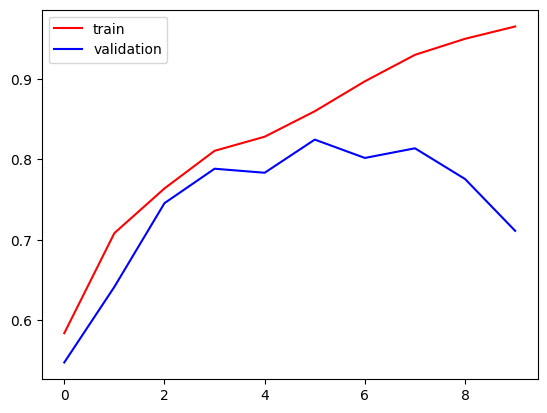

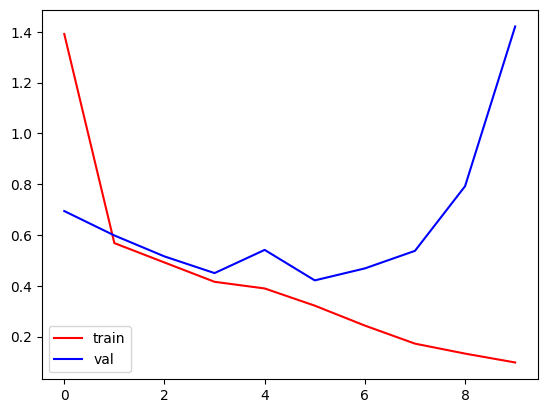

In [5]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color = 'red',label='train')
plt.plot(history.history['val_loss'], color = 'blue',label='validation')
plt.legend(['train', 'val'])
plt.show()

In [6]:
import cv2

In [8]:
import numpy as np

# Load the images
img1 = cv2.imread('/content/images.jpg')
img2 = cv2.imread('/content/cat.jpg')
img3 = cv2.imread('/content/d.jpg')

img1 = cv2.resize(img1, (256, 256))
img2 = cv2.resize(img2, (256, 256))
img3 = cv2.resize(img3, (256, 256))

img1/255.0
img2/255.0
img3/255.0

# Ensure the images have the same shape


# Store them in a NumPy array
images = np.array([img1, img2, img3])

test_input = images.reshape((3, 256, 256, 3))

model.predict(test_input)

1/1 [==============================] - 1s 707ms/step


array([[0.],
       [0.],
       [0.]], dtype=float32)

In [9]:
import pandas as pd

predictions = []
true_labels = []

for images, labels in validation_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels
    predictions.extend(preds)
    true_labels.extend(labels.numpy())

# Create DataFrame
results_df = pd.DataFrame({
    'TrueLabel': true_labels,
    'PredictedLabel': predictions
})

# Save to CSV
results_df.to_csv('/content/validation_predictions.csv', index=False)
print("Predictions saved to validation_predictions.csv")

1/1 [==============================] - 0s 115ms/step
Predictions saved to validation_predictions.csv


In [10]:
from google.colab import files
files.download('/content/validation_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import cv2
import numpy as np


# Load your trained model (assuming it's already trained and saved as 'model.h5')


# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")
    img = cv2.resize(img, (256, 256))
    img = img / 255.0  # Normalize the image to [0, 1] range
    return img

# Paths to your images
img1 = '/content/4.jpg'
img2 = '/content/1.jpg'
img3 = '/content/5.jpg'
img4 ='/content/6.jpg'
img5 = '/content/images.jpg'

# Preprocess images
image1 = preprocess_image(img1)
image2 = preprocess_image(img2)
image3 = preprocess_image(img3)
image4 = preprocess_image(img4)
image5=preprocess_image(img5)

# Convert list to NumPy array and ensure the shape is correct
test_images = np.array([image1, image2, image3, image4, image5]).reshape((5, 256, 256, 3))

# Make predictions
predictions = model.predict(test_images)

# Convert probabilities to binary predictions
binary_predictions = (predictions >= 0.5).astype(int).flatten()

# Print the predictions
for i, prediction in enumerate(binary_predictions):
    if prediction == 0:
        label = 'Cat'
    else:
        label = 'Dog'
    print(f"Prediction for image {i+1}: {label}")



1/1 [==============================] - 0s 19ms/step
Prediction for image 1: Dog
Prediction for image 2: Dog
Prediction for image 3: Cat
Prediction for image 4: Cat
Prediction for image 5: Cat


In [ ]:
-